## Ejemplo de aplicación de lógica difusa (fuzzy)

El problema es definir el valor de la propina en un restaurante en función de la calidad del servicio y la comida.

* **Entrada (antecedentes):** 

> Calidad de la Comida
>> Universo (rango de valores claro/nítido): 0 a 10

>> Conjunto difuso (valores difusos): terrible, comestible, delicioso

> Calidad de Servicio
>> Universo (rango de valores claro/nítido): 0 a 10

>> Conjunto difuso (valores difuso): malo, aceptable, excelente


* **Salida (consecuentes):**

> Consejo 

>> Universo (valores nítidos/nítidos): 0 a 25%

>> Conjunto difuso (valores difusos): baja, media, alta

### Regras de Decisión

> SI el servicio fue excelente O la comida deliciosa ENTONCES la propina debe ser alta

> SI el servicio fue aceptable ENTONCES la propina debe ser promedio

> SI el servicio fue malo Y la comida terrible ENTONCES la propina debe ser baja



In [2]:
# Se necessário, instale o pacote skfuzzy
!pip install networkx==2.3
!pip install scikit-fuzzy


     |████████████████████████████████| 1.7 MB 8.5 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=e0f452e584556d2a3c1709a9a022fba8102fe7156790bb84be4f7ff64a02c3bd
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 993 kB 7.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e3821617ea046131f33cf5113de3941997341c1853f6396ef852434615

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Crear las variables del problema

comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio')
propina = ctrl.Consequent(np.arange(0, 26, 1), 'propina')

# Crear automáticamente el mapeo entre valores nítidos y difusos
# usando una función de membresía estándar (triángulo)
comida.automf(names=['pesima', 'comible', 'deliciosa'])


# Crear funciones de membresía usando diferentes tipos
servicio['mala'] = fuzz.trimf(servicio.universe, [0, 0, 5])
servicio['aceptable'] = fuzz.gaussmf(servicio.universe, 5, 2)
servicio['excelente'] = fuzz.gaussmf(servicio.universe, 10,3)

propina['baja'] = fuzz.trimf(propina.universe, [0, 0, 13])
propina['media'] = fuzz.trapmf(propina.universe, [0, 13,15, 25])
propina['alta'] = fuzz.trimf(propina.universe, [15, 25, 25])

### Mostrando gráficamente las funciones de parte creadas

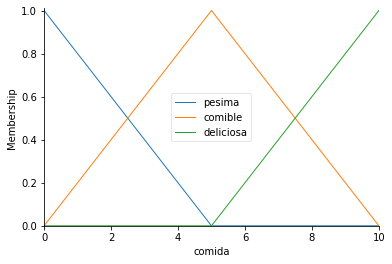

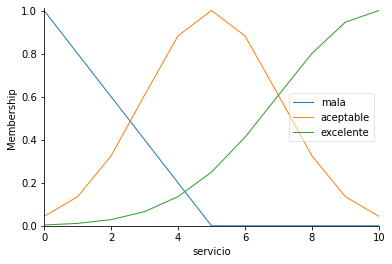

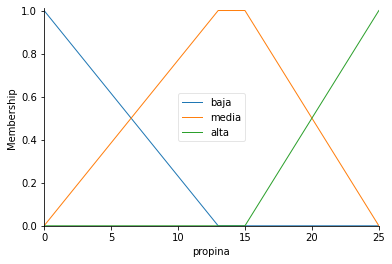

In [7]:
comida.view()
servicio.view()
propina.view()


### Creación de reglas de decisión difusas

In [8]:
rule1 = ctrl.Rule(servicio['excelente'] | comida['deliciosa'], propina['alta'])
rule2 = ctrl.Rule(servicio['aceptable'], propina['media'])
rule3 = ctrl.Rule(servicio['mala'] & comida['pesima'], propina['baja'])

### Creación y simulación de un controlador difuso

In [9]:
propina_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
propina_simulador = ctrl.ControlSystemSimulation(propina_ctrl)

# Entrando con algunos valores para la calidad de la comida y el servicio.
propina_simulador.input['comida'] = 3.5
propina_simulador.input['servicio'] = 9.4

# Calculando el resultado
propina_simulador.compute()
print(propina_simulador.output['propina'])


18.57604101547121


### Mostrando graficamente o resultado

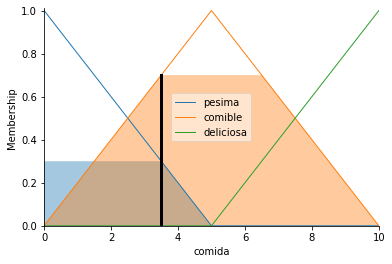

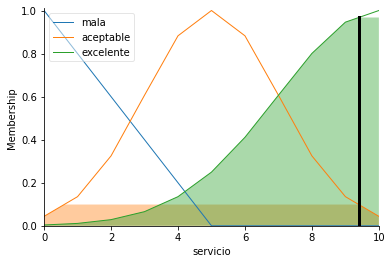

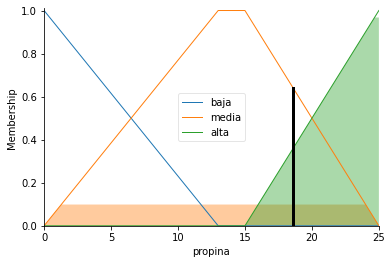

In [10]:
comida.view(sim=propina_simulador)
servicio.view(sim=propina_simulador)
propina.view(sim=propina_simulador)